In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.base import DAG
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
from sklearn.preprocessing import KBinsDiscretizer

import warnings
warnings.filterwarnings("ignore")

In [26]:
np.random.seed(42)

num_rows = 200000

data = {
    'ProductID': np.arange(1, num_rows + 1),
    'Revenue': np.random.randint(500, 2501, size=num_rows), 
    'Amount': np.random.randint(200, 1001, size=num_rows), 
    'Cashback': np.random.randint(20, 101, size=num_rows), 
    'Reward': np.random.randint(3, 17, size=num_rows) 
}

df = pd.DataFrame(data)

In [27]:
df.head()

,ProductID,Revenue,Amount,Cashback,Reward
0,1,1626,753,49,12
1,2,1959,756,63,11
2,3,1360,460,98,6
3,4,1794,728,61,7
4,5,1630,348,47,12


In [28]:
df.describe()

,ProductID,Revenue,Amount,Cashback,Reward
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,1500.686870,600.702225,59.863165,9.507315
std,57735.171256,577.154761,231.632833,23.369527,4.034094
min,1.000000,500.000000,200.000000,20.000000,3.000000
25%,50000.750000,1002.000000,400.000000,40.000000,6.000000
50%,100000.500000,1501.000000,601.000000,60.000000,10.000000
75%,150000.250000,2000.000000,801.000000,80.000000,13.000000
max,200000.000000,2500.000000,1000.000000,100.000000,16.000000


In [29]:
df1 = df.copy()
continuous_columns = ['Revenue', 'Amount', 'Cashback', 'Reward']
num_bins = 10

discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
df1[continuous_columns] = discretizer.fit_transform(df1[continuous_columns])

In [30]:
df1

,ProductID,Revenue,Amount,Cashback,Reward
0,1,5.0,6.0,3.0,6.0
1,2,7.0,6.0,5.0,6.0
2,3,4.0,3.0,9.0,2.0
3,4,6.0,6.0,5.0,3.0
4,5,5.0,1.0,3.0,6.0
...,...,...,...,...,...
199995,199996,6.0,0.0,3.0,6.0
199996,199997,0.0,9.0,1.0,8.0
199997,199998,6.0,0.0,9.0,9.0
199998,199999,8.0,5.0,4.0,9.0


In [31]:
# num_bins = 10

In [32]:
# def discretize_continuous_variables(data, columns_to_discretize, num_bins=5):
#     for col in columns_to_discretize:
#         if data[col].dtype == 'int64' or data[col].dtype == 'float64': 
#             data[col] = pd.cut(data[col], bins=num_bins, labels=False)
#     # return data
# 
# continuous_columns = ['Revenue', 'Amount', 'Cashback', 'Reward']
# 
# df_discretized = discretize_continuous_variables(df.copy(), continuous_columns, num_bins=num_bins)
# 
# df_discretized['ProductID'] = df['ProductID'].astype('category')


In [33]:
# df_discretized

In [34]:
def plot_network(network: 'DAG', name: str = 'Network', save_image: bool = False):
  fig, ax = plt.subplots(1, 1, figsize=(12, 12))
  nx.draw_networkx(network, pos=nx.drawing.layout.circular_layout(network), ax=ax, node_size=5000)
  ax.set_title(name)
  if save_image:
    fig.savefig(name)

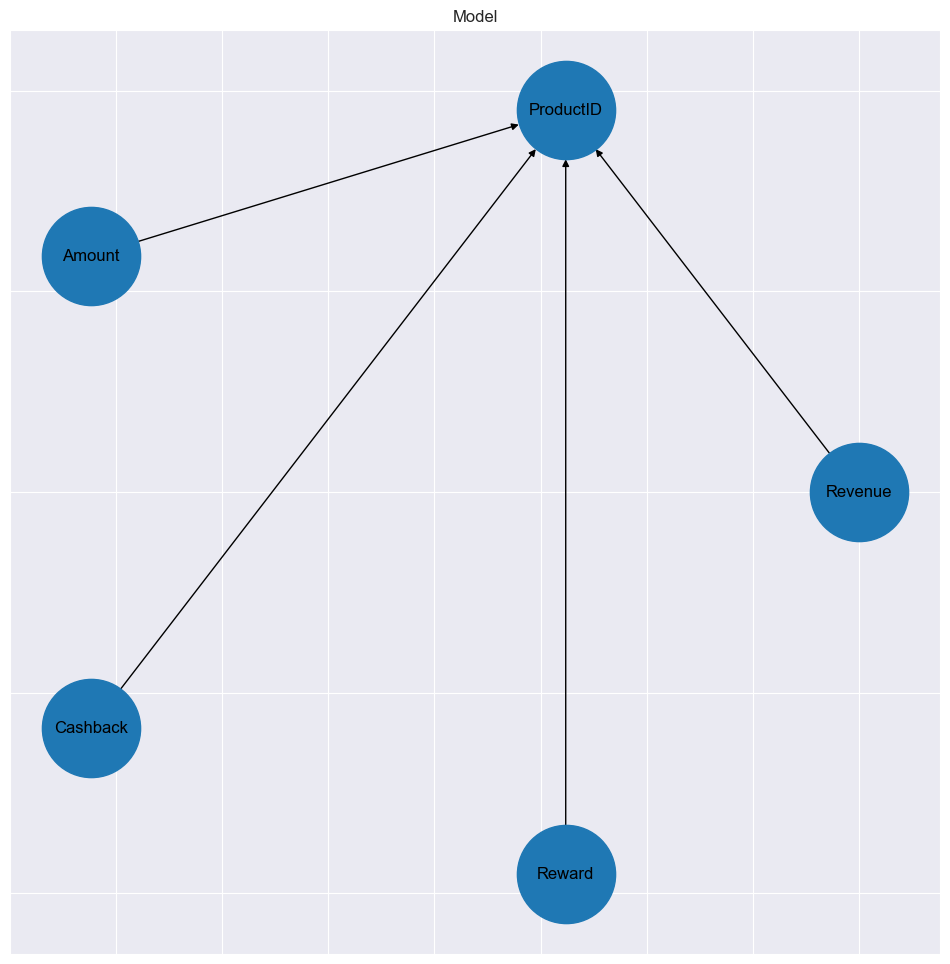

In [35]:
model = BayesianNetwork([('Revenue','ProductID'),('Amount','ProductID'),('Cashback','ProductID'),('Reward','ProductID')])
plot_network(model, 'Model')

In [ ]:
model.fit(df1, estimator=BayesianEstimator)

In [13]:
evidence_continuous = {
    'Revenue': 1270,
    'Amount': 1000,
    'Cashback': 50,
    'Reward': 11
}

# Discretize the evidence values
evidence_df = pd.DataFrame([evidence_continuous])
evidence_discretized = discretizer.transform(evidence_df)

In [14]:
tmp = pd.DataFrame(evidence_discretized)

In [15]:
tmp.columns = ['Revenue', 'Amount', 'Cashback', 'Reward']

In [16]:
tmp

,Revenue,Amount,Cashback,Reward
0,3.0,9.0,3.0,6.0


In [17]:
tmp_1 = model.predict_probability(tmp).T
tmp_1.columns = ['Probabilities']
tmp_1.sort_values(by='Probabilities', ascending=False, inplace=True)

In [18]:
tmp_1

,Probabilities
ProductID_16610,8.332986e-02
ProductID_7830,8.332986e-02
ProductID_66506,8.332986e-02
ProductID_24521,8.332986e-02
ProductID_83678,8.332986e-02
...,...
ProductID_33336,4.166493e-10
ProductID_33335,4.166493e-10
ProductID_33334,4.166493e-10
ProductID_33333,4.166493e-10


In [19]:
# from pgmpy.inference import BeliefPropagation
# evidence= {
#     'Revenue': 5,
#     'Amount': 7,
#     'Cashback': 3,
#     'Reward': 6
# }

In [20]:
# bp = BeliefPropagation(model)
# 
# probabilities = bp.query(variables=['ProductID'], evidence=evidence)
# 
# # Extract probabilities as a numpy array
# prob_array = probabilities.values.flatten()


In [21]:
# prob_array

In [22]:
# final_data = df[['ProductID']]
# final_data['Probability'] = prob_array

In [23]:
# final_data.sort_values(by='Probability', ascending=False).reset_index(drop=True)

In [25]:
df1[df1['ProductID'].isin([16610,7830])]

,ProductID,Revenue,Amount,Cashback,Reward
7829,7830,3.0,9.0,3.0,6.0
16609,16610,3.0,9.0,3.0,6.0


In [ ]:
df[df['ProductID'].isin([37,595])]